<a href="https://colab.research.google.com/github/lemoon12/contest_Public_Bicycle/blob/master/EDA/Goyang_Public_bicycles_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 EDA 및 시각화
1.   대여소 살펴보기
2.   항목 추가



# 0. 준비

## (0) 한글폰트 시각화에 사용하기

In [121]:
# 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
# matplotlib 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


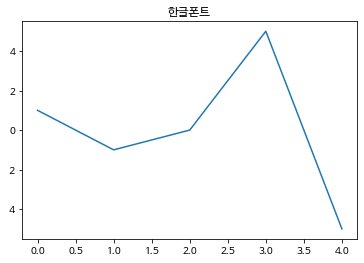

In [2]:
# 확인해보기
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

## (1) 구글드라이브 코랩 연동시키기

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = '/content/gdrive/My Drive/Colab Notebooks/datacontest_compas/고양시피프틴'
PROJECT_PATH = join('/content/gdrive', MY_GOOGLE_DRIVE_PATH)

In [10]:
%cd "{PROJECT_PATH}"
%ls

/content/gdrive/My Drive/Colab Notebooks/datacontest_compas/고양시피프틴
 01.운영이력.csv                             20.고양시_버스정류소.csv
 02.자전거스테이션.csv                       21.버스_정류장별_승하차_정보.csv
 03.꽃박람회일정.csv                         22.주차장정보.csv
 04.KINTEX행사일정.csv                       23.고양시덕양구_DEM.img
 05.기상정보.csv                             24.고양시일산동구_DEM.img
'06.인구(거주)분포도(100M_X_100M).geojson'   25.고양시일산서구_DEM.img
 07.인구통계.csv                            '26.고양시 공연장 박물관 정보.csv'
'08.행정경계(시군구).geojson'               '27.고양시 체육시설 현황 정보.csv'
'09.행정경계(읍면동).geojson'                28.코드정의서.xlsx
'10.도시계획(공간시설).geojson'             '29.지하철 역별 이용객수.csv'
'11.도시계획(공공문화체육시설).geojson'      30.고양시_덕양구_고도.geojson
'12.도시계획(교통시설).geojson'              31.고양시_

## (2) 필요한 패키지 불러오기

In [11]:
!pip install geopandas
!pip install geojson
!pip install haversine     # 좌표간 거리 구하기
!pip install tqdm

In [12]:
import json
import pandas as pd
import numpy as np
import geojson
from haversine import haversine
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso
from shapely.geometry import shape, GeometryCollection, Point
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (20, 10)

## (3) 파일 불러오기


> df = geopandas.read_file("파일 경로/파일명.geojson")

> df = pd.read_csv("파일경로/파일명.csv")


> geo_path="34.행정경계(행정동기준).geojson"

> geo_str=geojson.load(open(geo_path,encoding='utf-8'))





In [97]:
%ls

 01.운영이력.csv                             20.고양시_버스정류소.csv
 02.자전거스테이션.csv                       21.버스_정류장별_승하차_정보.csv
 03.꽃박람회일정.csv                         22.주차장정보.csv
 04.KINTEX행사일정.csv                       23.고양시덕양구_DEM.img
 05.기상정보.csv                             24.고양시일산동구_DEM.img
'06.인구(거주)분포도(100M_X_100M).geojson'   25.고양시일산서구_DEM.img
 07.인구통계.csv                            '26.고양시 공연장 박물관 정보.csv'
'08.행정경계(시군구).geojson'               '27.고양시 체육시설 현황 정보.csv'
'09.행정경계(읍면동).geojson'                28.코드정의서.xlsx
'10.도시계획(공간시설).geojson'             '29.지하철 역별 이용객수.csv'
'11.도시계획(공공문화체육시설).geojson'      30.고양시_덕양구_고도.geojson
'12.도시계획(교통시설).geojson'              31.고양시_일산동구_고도.geojson
'13.용도지역지구(습지보호지역).geojson

In [7]:
# csv
df_1 = pd.read_csv("01.운영이력.csv")
df_7 = pd.read_csv("07.인구통계.csv")

# csv_위치
df_2 = pd.read_csv("02.자전거스테이션.csv")
df_18 = pd.read_csv("18.행사장_공간정보.csv")
df_19 = pd.read_csv("19.전철역_공간정보.csv")
df_20 = pd.read_csv("20.고양시_버스정류소.csv")
df_22 = pd.read_csv("22.주차장정보.csv")
df_26 = pd.read_csv("26.고양시 공연장 박물관 정보.csv")
df_27 = pd.read_csv("27.고양시 체육시설 현황 정보.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# geojson
df_6 = geopandas.read_file('06.인구(거주)분포도(100M_X_100M).geojson')
df_8 = geopandas.read_file('08.행정경계(시군구).geojson')
df_9 = geopandas.read_file('09.행정경계(읍면동).geojson')
df_10 = geopandas.read_file('10.도시계획(공간시설).geojson')
df_11 = geopandas.read_file('11.도시계획(공공문화체육시설).geojson')
df_12 = geopandas.read_file('12.도시계획(교통시설).geojson')
df_15 = geopandas.read_file('15.도로명주소_건물.geojson')
df_34 = geopandas.read_file('34.행정경계(행정동기준).geojson')

# 1. 대여소 살펴보기

## (1) 데이터 셋 만들기 
- 자전거 스테이션과 위치 데이터 결합
- 필요한 컬럼
  + 구 - 동 - 대여소 ID - 대여소번호 - 대여소명 - 거치대수 - 위도 - 경도
- 필요한 데이터
  + df_2 - '02.자전거스테이션.csv'
  + df_8 - '08.행정경계(시군구).geojson'
  + df_34 - '34.행정경계(행정동기준).geojson'

### (a) 구
- 스테이션이 위치한 구 추출

In [16]:
df_2=pd.read_csv('02.자전거스테이션.csv') ; df_2.head()

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530


In [18]:
df_8=gpd.read_file('08.행정경계(시군구).geojson') ; df_8.head()

,SIG_CD,SIG_KOR_NM,geometry
0,41281,고양시덕양구,"MULTIPOLYGON (((126.92910 37.74849, 126.92964 ..."
1,41285,고양시일산동구,"MULTIPOLYGON (((126.77762 37.67899, 126.77825 ..."
2,41287,고양시일산서구,"MULTIPOLYGON (((126.76703 37.70717, 126.76719 ..."


In [ ]:
geo_path_8='08.행정경계(시군구).geojson'  # 행안부 기준 행정경계
geo_str_8= geojson.load(open(geo_path_8,encoding='utf-8'))
geo_str_8

In [26]:
# 스테이션의 좌표로 '구' 찾기

point = [Point(xy) for xy in zip(df_2.경도, df_2.위도)] # 모든 스테이션의 (경도, 위도)를 가지고 있음

gu=[]
location=[]
id=[]

for feature in geo_str_8['features']:
  polygon = shape(feature['geometry'])                  # geostr내의 행정동 좌표값을 각각 가져와서 polygon 형태로 만듦
  for p in range(len(point)):
    if polygon.contains(point[p]):                      # 행정동이 스테이션의 (경도,위도)를 가지고 있다면
      gu.append(feature['properties']['SIG_KOR_NM'])    # 그 행정구 이름을 gu에 넣고
      location.append(point[p])                         # 스테이션의 (경도,위도)를 location에 넣고
      id.append(df_2['Station_ID'][p])                  # 스테이션의 이름을 id에 넣고

st_g=pd.DataFrame([gu,location,id])                     # 스테이션별 좌표, 스테이션이 위치한 동의 이름으로 df 만들기
st_g=st_g.T
st_g.columns=['gu','좌표','Station_ID']
st_g[['Station_ID','좌표','gu']]                        # 한 번 확인하기
st_g=st_g[['Station_ID','gu']]
st_g

,Station_ID,gu
0,101,고양시덕양구
1,103,고양시덕양구
2,105,고양시덕양구
3,106,고양시덕양구
4,110,고양시덕양구
...,...,...
159,349,고양시일산서구
160,350,고양시일산서구
161,351,고양시일산서구
162,352,고양시일산서구


### (b) 동
- 스테이션이 위치한 동 추출

In [27]:
df_2=pd.read_csv('02.자전거스테이션.csv')

geo_path_34="34.행정경계(행정동기준).geojson"
geo_str_34=geojson.load(open(geo_path_34,encoding='utf-8'))
geo_str_34

{"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "features": [{"geometry": {"coordinates": [[[[126.835138, 37.676835], [126.835169, 37.676584], [126.835196, 37.676321], [126.835223, 37.676218], [126.835248, 37.675969], [126.835269, 37.675854], [126.835242, 37.675556], [126.835243, 37.675498], [126.835218, 37.675428], [126.835221, 37.675395], [126.835106, 37.675151], [126.834979, 37.674919], [126.835111, 37.674796], [126.835278, 37.674627], [126.835316, 37.674591], [126.835332, 37.674575], [126.835355, 37.674593], [126.835711, 37.674254], [126.835773, 37.674103], [126.835804, 37.674091], [126.835856, 37.67407], [126.835949, 37.674027], [126.836158, 37.673745], [126.836396, 37.673432], [126.836466, 37.673158], [126.836511, 37.673103], [126.836535, 37.673082], [126.836613, 37.673009], [126.83669, 37.672946], [126.837199, 37.67271], [126.837262, 37.672692], [126.837351, 37.672513], [126.837614, 37.672338], [126.83798, 37.67225], [126.838167, 37.672093], [1

In [28]:
point= [Point(xy) for xy in zip(df_2.경도, df_2.위도)]  # 모든 스테이션의 (경도, 위도)를 가지고 있음

dong=[]
id=[]

for feature in geo_str_34['features']:                      
    polygon = shape(feature['geometry'])               # geostr내의 행정동 좌표값을 각각 가져와서 polygon 형태로 만듦
    for p in range(len(point)):
      if polygon.contains(point[p]):                    # 행정동이 스테이션의 (경도, 위도)를 가지고 있다면
        dong.append(feature['properties']['행정동명'])  # 그 행정동의 이름을 dong에 넣고
        id.append(df_2['Station_ID'][p])                # 스테이션의 이름을 id에 넣음
        
st_d=pd.DataFrame([dong,id])      # 스테이션별 좌표와, 스테이션이 위치한 동의 이름으로 df만듦
st_d=st_d.T
st_d.columns=['dong','Station_ID']
st_d=st_d[['Station_ID','dong']]
st_d

,Station_ID,dong
0,146,주교동
1,170,원신동
2,171,원신동
3,172,원신동
4,173,원신동
...,...,...
159,346,송산동
160,347,송산동
161,348,송산동
162,349,송산동


### (c) 구 + 동 + 스테이션 위치

In [33]:
station = pd.merge(df_2, st_g, on='Station_ID')
station = pd.merge(station, st_d, on='Station_ID')
station = station[['gu','dong','Station_ID','STATION_NAME','거치대 수량','경도','위도']]
station

,gu,dong,Station_ID,STATION_NAME,거치대 수량,경도,위도
0,고양시덕양구,성사2동,101,어울림마을 701동 앞,20,126.834584,37.654775
1,고양시덕양구,성사1동,103,대림e-편한세상106동,20,126.840377,37.660442
2,고양시일산서구,탄현동,104,탄현마을8단지,25,126.766042,37.698523
3,고양시덕양구,성사1동,105,KT 덕양지사 앞,20,126.839261,37.655244
4,고양시덕양구,성사1동,106,원당역 앞 공영주차장,30,126.842530,37.653410
...,...,...,...,...,...,...,...
159,고양시일산서구,송산동,350,★하이파크5단지 502동앞 버스정류장,20,126.753089,37.697867
160,고양시일산서구,탄현동,351,◆일산에듀포레 푸르지오,40,126.767231,37.702259
161,고양시일산서구,대화동,352,◆꿈에그린203동앞,40,126.749244,37.666425
162,고양시일산서구,대화동,353,◆꿈에그린106동앞,40,126.750784,37.666720


## (2) 대여소 시각화

### (a) 고양시 스테이션 시각화